# Topic 39: Natural Language Processing + Topic 28: Bayesian Classification

- 06/03/21
- onl01-dtsc-ft-022221

## Learning Objectives (Part 1)

- Introduce the field of Natural Language Processing
- Learn about the extensive preprocessing involved with text data
- Walk through text classification - Finding Trump 
- Discuss how to use GridSearchCV for our text preprocessing/vectorization choices. 



## Questions

-  

# **`Part 1` Topic 39: Natural Language Processing**

> **_Natural Language Processing_**, or **_NLP_**, is the study of how computers can interact with humans through the use of human language.  Although this is a field that is quite important to Data Scientists, it does not belong to Data Science alone.  NLP has been around for quite a while, and sits at the intersection of *Computer Science*, *Artificial Intelligence*, *Linguistics*, and *Information Theory*. 

## Where is NLP Used?


- Reviews (i.e. Amazon)
- AI Assistants - [Google Duplex AI Assistant](https://youtu.be/D5VN56jQMWM)
- Spam Detection
- Stock market trading - [Volvfefe Index]( https://www.bloomberg.com/news/articles/2019-09-09/jpmorgan-creates-volfefe-index-to-track-trump-tweet-impact)
- Chatbots/Text Generation [GPT2 Blog Post](https://openai.com/blog/better-language-models/)

## Working with Text Data

To prepare text data for modeling, **it is essential to preprocess the text** and simplify its contents.
<br><br>
1. **At a minimum, things like:**
    - punctuation
    - numbers
    - upper vs lowercase letters<br>
    ***must*** be addressed before any initial analyses. 



2. It is **usually recommended** to remove **commonly used words that contain little information** <br>for our machine learning algorithms. Words like: (the,was,he,she, it,etc.)<br> are called **"stopwords"**, and it is critical to address them as well.


3. Our text will need to be separated in a list of words, AKA **tokenized**.
    - A list of words (**tokens**) separated by ",", which tells the algorithm what should be considered one word.
    - There are different methods/tools for tokenizing the data, which can make a big difference on the resulting text.
    
    
    
4. While not always required, it is often a good idea to reduce similar words down to a shared core.
    - There are often **multiple variants of the same word with the same/simiar meaning**, but one may plural **(i.e. "democrat" and "democrats")**, or form of words is different **(i.e. run, running).** 
    - Simplifying words down to the basic core word (or word *stem*) is referred to as **"stemming"**. <br><img src="https://raw.githubusercontent.com/learn-co-students/dsc-nlp-and-word-vectorization-online-ds-ft-100719/master/images/new_stemming.png" width=40%>
    
    - A more advanced form of this also understands things like words that are just in a **different tense** such as  i.e.  **"ran", "run", "running"**. This process is called  **"lemmatization**, where the words are reduced to their simplest form, called "**lemmas**"
     
|   Word   |  Stem | Lemma |
|:--------:|:-----:|:-----:|
|  Studies | Studi | Study |
| Studying | Study | Study |

5. Finally, we have to convert our text data into numeric form for our machine learning models to analyze, a process called **vectorization**.
    - There are also several options for vectorization, which can also have a great impact on the resulting model.


## Practice Preprocessing Text with Trump's Tweets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')

## NLP Imports
import nltk
from nltk import FreqDist,word_tokenize,regexp_tokenize,TweetTokenizer
from nltk.corpus import stopwords
import string

# !pip install wordcloud
from wordcloud import WordCloud

In [2]:
## Load in the finding-trump.csv
finding_trump = '../finding-trump.csv'
df = pd.read_csv(finding_trump)
df

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
0,Twitter Media Studio,https://t.co/EVAEYD1AgV,01-01-2020 03:12:07,25016,108830,False,1212209862094012416
1,Twitter for iPhone,HAPPY NEW YEAR!,01-01-2020 01:30:35,85409,576045,False,1212184310389850119
2,Twitter for iPhone,Our fantastic First Lady! https://t.co/6iswto4WDI,01-01-2020 01:22:28,27567,132633,False,1212182267113680896
3,Twitter for iPhone,RT @DanScavino: https://t.co/CJRPySkF1Z,01-01-2020 01:18:47,10796,0,True,1212181341078458369
4,Twitter for iPhone,RT @SenJohnKennedy: I think Speaker Pelosi is ...,01-01-2020 01:17:43,8893,0,True,1212181071988703232
...,...,...,...,...,...,...,...
14061,Twitter for Android,The President of Taiwan CALLED ME today to wis...,12-03-2016 00:44:20,24700,111106,False,804848711599882240
14062,Twitter for iPhone,Thank you Ohio! Together we made history – and...,12-02-2016 02:45:18,17283,72196,False,804516764562374656
14063,Twitter for iPhone,Heading to U.S. Bank Arena in Cincinnati Ohio ...,12-01-2016 22:52:10,5564,31256,False,804458095569158144
14064,Twitter for Android,Getting ready to leave for the Great State of ...,12-01-2016 14:38:09,9834,57249,False,804333771021570048


In [3]:
## Create a variable "corpus" containing all text
corpus = df['text'].to_list()

## Preview first 5 entries 
corpus[:5]

['https://t.co/EVAEYD1AgV',
 'HAPPY NEW YEAR!',
 'Our fantastic First Lady! https://t.co/6iswto4WDI',
 'RT @DanScavino: https://t.co/CJRPySkF1Z',
 'RT @SenJohnKennedy: I think Speaker Pelosi is having 2nd thoughts about impeaching the President. The Senate should get back to work on USM…']

### Make a Bag-of-Words Frequency Distribution 

- "bag-of-words": collection of all words from a corpus and their frequencies


In [4]:
from nltk import FreqDist

In [5]:
## Make a FreqDist from the corpus
freq = FreqDist(','.join(corpus))
## Display 100 most common words
freq.most_common(100)

[(' ', 355279),
 ('e', 193636),
 ('t', 151004),
 ('a', 133814),
 ('o', 132306),
 ('n', 115782),
 ('i', 111789),
 ('r', 107277),
 ('s', 97228),
 ('h', 76548),
 ('l', 67415),
 ('d', 57543),
 ('u', 46550),
 ('c', 45746),
 ('m', 43554),
 ('p', 37247),
 ('g', 35477),
 ('y', 33375),
 ('.', 32244),
 ('w', 30005),
 ('f', 29211),
 ('b', 22246),
 ('T', 19911),
 ('v', 17186),
 (',', 14545),
 ('k', 13783),
 ('/', 13588),
 ('S', 12999),
 ('A', 12922),
 ('R', 12294),
 ('C', 10866),
 ('I', 10743),
 (':', 9821),
 ('N', 9009),
 ('!', 8861),
 ('D', 8787),
 ('@', 8646),
 ('M', 8063),
 ('E', 8008),
 ('P', 7726),
 ('W', 7249),
 ('O', 6828),
 ('H', 6614),
 ('B', 6115),
 ('G', 5937),
 ('F', 5701),
 ('L', 4774),
 ('U', 4765),
 ('0', 4659),
 ('x', 4068),
 ('J', 4060),
 ('’', 3445),
 ('1', 3191),
 ('j', 3084),
 ('…', 2956),
 ('2', 2812),
 ('-', 2672),
 ('K', 2622),
 ('V', 2460),
 ('Y', 2194),
 (';', 2105),
 ('z', 2082),
 ('&', 2079),
 ('“', 1993),
 ('”', 1890),
 ('5', 1848),
 ('#', 1785),
 ('3', 1730),
 ('4', 1

> That's not quite right...

In [6]:
## Tokenize corpus then generate FreqDist
from nltk import word_tokenize

## Convert Corpus to Tokens
tokens = word_tokenize(','.join(corpus))

## Check first 5 tokens
print(tokens[:5])

['https', ':', '//t.co/EVAEYD1AgV', ',', 'HAPPY']


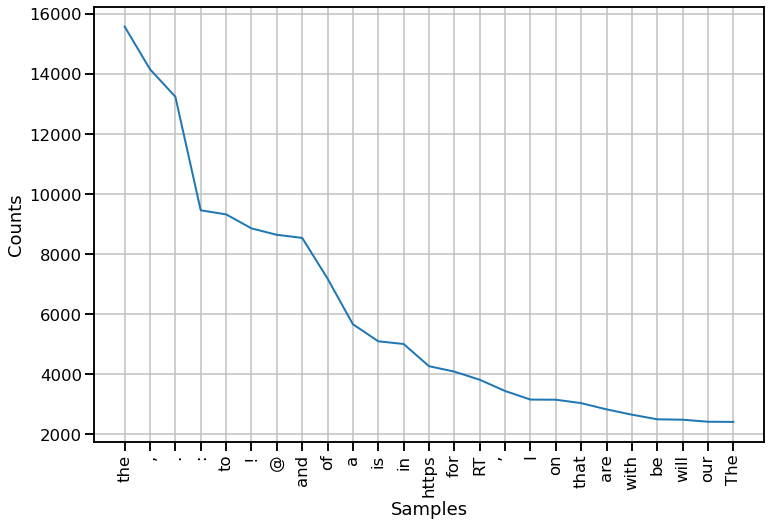

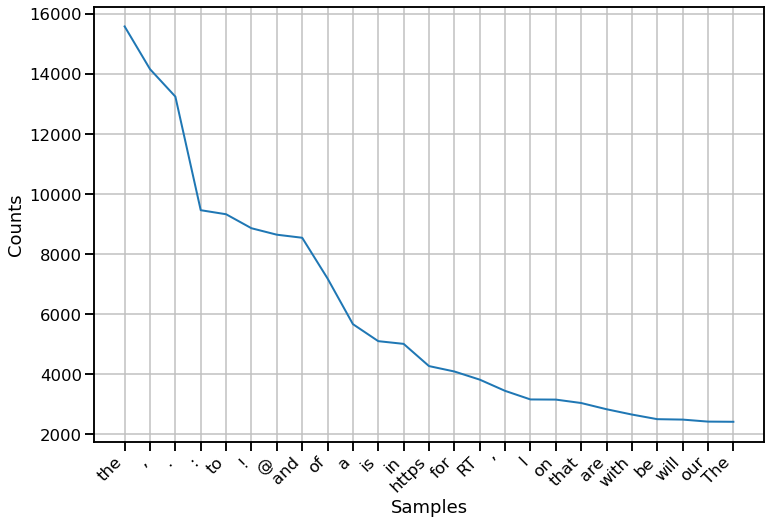

In [7]:
## Get FreqDist and plot the 25 most_common tokens
freq = FreqDist(tokens)

fig, ax = plt.subplots(figsize=(12,8))
freq.plot(25);

## Rotate 
ax.set_xticklabels(ax.get_xticklabels(),
                   rotation=45,ha='right');
fig


<AxesSubplot:ylabel='word'>

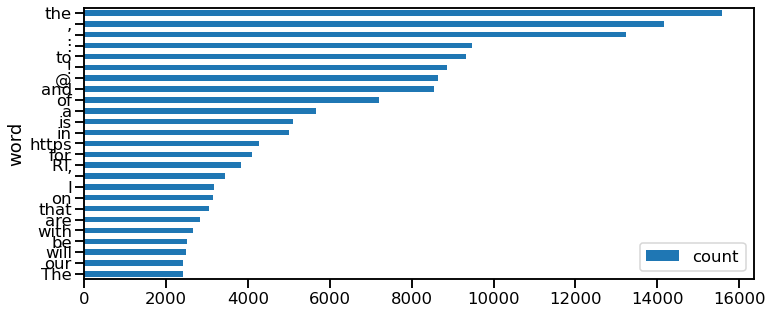

In [8]:
## Get the most_common 100 and make into a dataframe
most_common = pd.DataFrame(freq.most_common(100),
                           columns=['word','count']).sort_values('count',
                                                                 ascending=True)
most_common.set_index('word').tail(25).plot(kind='barh',figsize=(12,5))

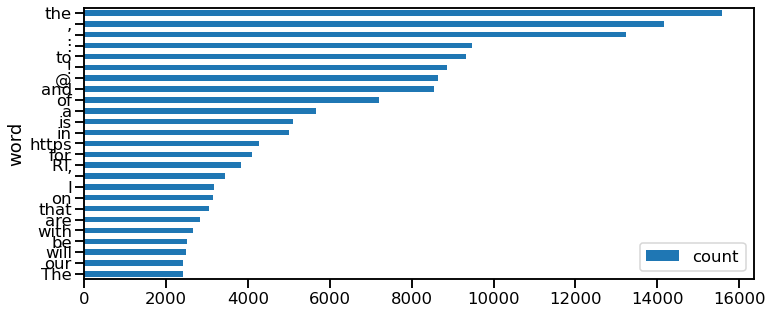

In [9]:
def plot_most_common(freq,n=25,figsize=(12,5)):
    most_common = pd.DataFrame(freq.most_common(n),
                           columns=['word','count']).sort_values('count',
                                                                 ascending=True)
    most_common.set_index('word').tail(n).plot(kind='barh',figsize=figsize)
    
plot_most_common(freq)

### Dealing with URLs, RT's, and @'s with `TweetTokenizer`

In [10]:
from nltk import TweetTokenizer
tokenizer = TweetTokenizer(preserve_case=False,)
tweet_tokens = tokenizer.tokenize(','.join(corpus))
tweet_tokens[:5]

['https://t.co/EVAEYD1AgV,HAPPY', 'new', 'year', '!', ',']

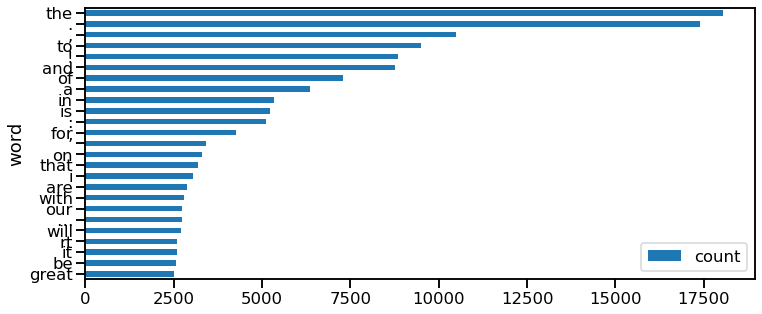

In [11]:
## Make a new freq dist for tweet tokens and plot most common
tweet_freq = FreqDist(tweet_tokens)
plot_most_common(tweet_freq)

> Better...but what's our next issue?

In [12]:
## Make a list of stopwords to remove
from nltk.corpus import stopwords
import string

In [13]:
# Get all the stop words in the English language and preview first 10
stopwords_list = stopwords.words('english')
stopwords_list[:25]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers']

In [14]:
## Add punctuation to stopwords_list
stopwords_list.extend(string.punctuation)
stopwords_list[-10:]

['[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']

In [15]:
## Add the additional Tweet Punctuation below to stopwords_list
additional_punc = ['“','”','...',"''",'’','``']
stopwords_list.extend(additional_punc)

In [16]:
## Commentary on not always accepting what is or isn't in stopwords
print('until' in stopwords_list)


True


In [17]:
## Remove until from stopwords_list and check for it again
stopwords_list.remove('until')
print('until' in stopwords_list)


False


In [18]:
## Remove stopwords
stopped_tokens= [w.lower() for w in tweet_tokens  if w.lower() not in stopwords_list]
stopped_tokens[:50]

['https://t.co/evaeyd1agv,happy',
 'new',
 'year',
 'fantastic',
 'first',
 'lady',
 'https://t.co/6iswto4wdi,rt',
 '@danscavino',
 'https://t.co/cjrpyskf1z,rt',
 '@senjohnkennedy',
 'think',
 'speaker',
 'pelosi',
 '2nd',
 'thoughts',
 'impeaching',
 'president',
 'senate',
 'get',
 'back',
 'work',
 'usm',
 '…',
 'thank',
 'steve',
 'greatest',
 'witch',
 'hunt',
 'u',
 'history',
 'https://t.co/i3bsnvp6gc,rt',
 '@thisweekabc',
 'sen',
 'ron',
 'johnson',
 'says',
 'charges',
 'pres',
 'trump',
 'pretty',
 'thin',
 'gruel',
 'speaker',
 'nancy',
 "pelosi's",
 'decision',
 'withhold',
 '…',
 'rt',
 '@senjohnkennedy']

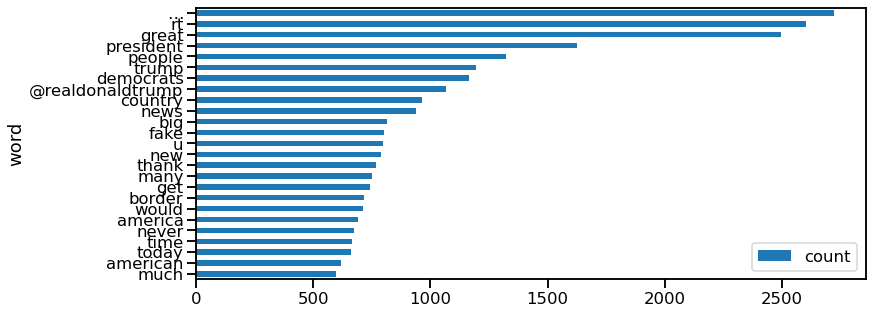

In [19]:
## Remake the FreqDist from stopped_tokens
freq = FreqDist(stopped_tokens)
plot_most_common(freq,25)

In [20]:
freq.most_common(10)

[('…', 2721),
 ('rt', 2604),
 ('great', 2495),
 ('president', 1626),
 ('people', 1324),
 ('trump', 1196),
 ('democrats', 1163),
 ('@realdonaldtrump', 1066),
 ('country', 965),
 ('news', 937)]

In [21]:
#### Appending our stopwords list
stopwords_list.extend(['…','rt','http','https','co'])
stopwords_list[-1]

'co'

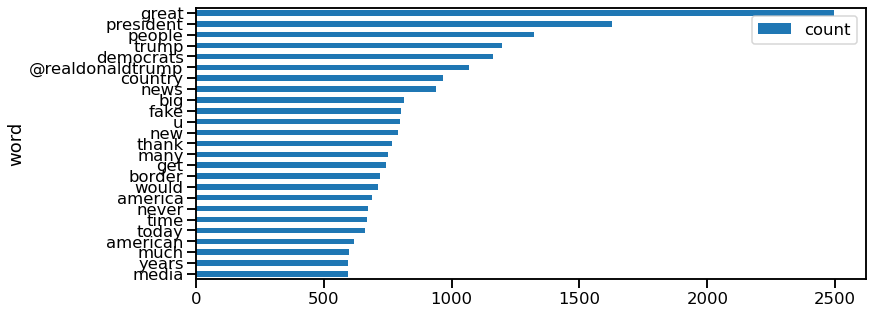

In [22]:
## Remake the FreqDist from stopped_tokens
stopped_tokens= [w.lower() for w in tweet_tokens  if w.lower() not in stopwords_list]
freq = FreqDist(stopped_tokens)
# freq.most_common(100)
plot_most_common(freq,25)

### Additional Ways to Show Frequency

- [Word Clouds](https://www.geeksforgeeks.org/generating-word-cloud-python/)

(-0.5, 399.5, 199.5, -0.5)

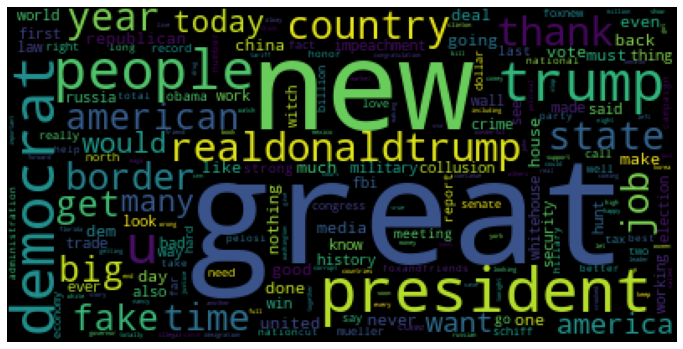

In [23]:
from wordcloud import WordCloud

## Initalize a WordCloud with our stopwords_list and no bigrams
wordcloud = WordCloud(stopwords=stopwords_list,collocations=False)

## Generate wordcloud from stopped_tokens
wordcloud.generate(','.join(stopped_tokens))

## Plot with matplotlib
plt.figure(figsize = (12, 12), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off')

### Comparing Phases of Proprocessing/Tokenization

In [24]:
from ipywidgets import interact

@interact
def tokenize_tweet(i=(0,len(corpus)-1)):
    from nltk.corpus import stopwords
    import string
    from nltk import word_tokenize,regexp_tokenize
    
    print(f"- Tweet #{i}:\n")
    print(corpus[i],'\n')
    tokens = word_tokenize(corpus[i])

    # Get all the stop words in the English language
    stopwords_list = stopwords.words('english')
    stopwords_list += string.punctuation
    stopwords_list += additional_punc
    stopped_tokens = [w.lower() for w in tokens if w.lower() not in stopwords_list]
    
    print(tokens,end='\n\n')
    print(stopped_tokens)

interactive(children=(IntSlider(value=7032, description='i', max=14065), Output()), _dom_classes=('widget-inte…

> What recognizable pattern of characters is high on the frequency list?

### Other Bag of Words Statistics

#### Bigrams

In [25]:
import nltk
bigram_measures = nltk.collocations.BigramAssocMeasures()
tweet_finder = nltk.BigramCollocationFinder.from_words(stopped_tokens)
tweets_scored = tweet_finder.score_ngrams(bigram_measures.raw_freq)

In [26]:
## Make a DataFrame from the Bigrams
pd.DataFrame(tweets_scored, columns=["Word","Freq"]).head(10)

,Word,Freq
0,"(fake, news)",0.002985
1,"(united, states)",0.002166
2,"(witch, hunt)",0.001576
3,"(president, trump)",0.001481
4,"(🇺, 🇸)",0.001394
5,"(white, house)",0.001092
6,"(america, great)",0.001078
7,"(news, media)",0.000987
8,"(president, @realdonaldtrump)",0.000973
9,"(north, korea)",0.000886


#### Mutual Information Scores

In [27]:
bigram_measures = nltk.collocations.BigramAssocMeasures()

tweet_pmi_finder = nltk.BigramCollocationFinder.from_words(stopped_tokens)
tweet_pmi_finder.apply_freq_filter(3)

tweet_pmi_scored = tweet_pmi_finder.score_ngrams(bigram_measures.pmi)

In [28]:
## Make a DataFrame from the Bigrams with PMI
pd.DataFrame(tweet_pmi_scored,columns=['Words','PMI']).head(20)

,Words,PMI
0,"(arnold, schwarzenegger)",16.086109
1,"(bashar, al-assad)",16.086109
2,"(des, moines)",16.086109
3,"(geary, higgins)",16.086109
4,"(jamie, dimon)",16.086109
5,"(pam, bondi)",16.086109
6,"(vadym, prystaiko)",16.086109
7,"(۴۰, سال)",16.086109
8,"(⛈, 🌪)",16.086109
9,"(@erik_paulsen, @jason2cd)",15.671071


### Regular Expressions [ Skippable]

- Regular expressions can help us capture/remove complicated patterns in our text.
- Best regexp resource and tester: https://regex101.com/

    - Make sure to check "Python" under Flavor menu on left side.
    
    
- Let's use regular expressions to remove URLs

In [29]:
## Select an example tweet
text =  corpus[6615]
text

'I will be in Green Bay Wisconsin on Saturday April 27th at the Resch Center — 7:00pm (CDT). Big crowd expected! #MAGA https://t.co/BPYK8PF0O8'

In [30]:
## Select a second example tweet
text2=corpus[7347]
text2

'RT @real_defender: @realDonaldTrump Protecting America and putting Americans first. Thank you Mr. President!'

In [31]:
## From tjhe lessons
from nltk import regexp_tokenize
pattern = r"([a-zA-Z]+(?:'[a-z]+)?)"
regexp_tokenize(text,pattern)

['I',
 'will',
 'be',
 'in',
 'Green',
 'Bay',
 'Wisconsin',
 'on',
 'Saturday',
 'April',
 'th',
 'at',
 'the',
 'Resch',
 'Center',
 'pm',
 'CDT',
 'Big',
 'crowd',
 'expected',
 'MAGA',
 'https',
 't',
 'co',
 'BPYK',
 'PF',
 'O']

#### Let's use regex to find/remove URLS

- www.regex101.com
    - Copy and paste example text to search
    - Test out regular expressions and see what they pick up

In [32]:
print(text,text2)

I will be in Green Bay Wisconsin on Saturday April 27th at the Resch Center — 7:00pm (CDT). Big crowd expected! #MAGA https://t.co/BPYK8PF0O8 RT @real_defender: @realDonaldTrump Protecting America and putting Americans first. Thank you Mr. President!


In [33]:
import re
re.findall(r"(https://\w*\.\w*/+\w+)",text)

['https://t.co/BPYK8PF0O8']

In [34]:
def clean_text(text,regex=True):
    from nltk.corpus import stopwords
    import string
    from nltk import word_tokenize,regexp_tokenize

    ## tokenize text
    if regex:
        pattern = r"([a-zA-Z]+(?:'[a-z]+)?)"
        tokens= regexp_tokenize(text,pattern)
    else:
        tokens = word_tokenize(text)
        
    # Get all the stop words in the English language
    stopwords_list = stopwords.words('english')
    stopwords_list += string.punctuation
    
    stopped_tokens = [w.lower() for w in tokens if w not in stopwords_list]
    
    return stopped_tokens

In [35]:
## Other uses of RegEx for Tweet preprocessing
import re

def find_urls(string): 
    return re.findall(r"(http[s]?://\w*\.\w*/+\w+)",string)

def find_hashtags(string):
    return re.findall(r'\#\w*',string)

def find_retweets(string):
    return re.findall(r'RT [@]?\w*:',string)

def find_mentions(string):
    return re.findall(r'\@\w*',string)

In [36]:
text

'I will be in Green Bay Wisconsin on Saturday April 27th at the Resch Center — 7:00pm (CDT). Big crowd expected! #MAGA https://t.co/BPYK8PF0O8'

In [37]:
find_urls(text)

['https://t.co/BPYK8PF0O8']

In [38]:
find_mentions(text2)

['@real_defender', '@realDonaldTrump']

## Stemming/Lemmatization

In [39]:
from nltk.stem.wordnet import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

print(lemmatizer.lemmatize('feet')) # foot
print(lemmatizer.lemmatize('running')) # run [?!] Does not match expected output

foot
running


In [40]:
text_in =  corpus[6615]
text_in

'I will be in Green Bay Wisconsin on Saturday April 27th at the Resch Center — 7:00pm (CDT). Big crowd expected! #MAGA https://t.co/BPYK8PF0O8'

In [41]:
def process_tweet(text,as_lemmas=False,as_tokens=True):
#     text=text.copy()
    for x in find_urls(text):
        text = text.replace(x,'')
        
    for x in find_retweets(text):
        text = text.replace(x,'')    
        
    for x in find_hashtags(text):
        text = text.replace(x,'')    

    if as_lemmas:
        from nltk.stem.wordnet import WordNetLemmatizer
        lemmatizer = WordNetLemmatizer()
        text = lemmatizer.lemmatize(text)
    
    if as_tokens:
        text = clean_text(text)
    
    if len(text)==0:
        text=''
            
    return text

In [42]:
@interact
def show_processed_text(i=(0,len(corpus)-1)):
    text_in = corpus[i]#.copy()
    print(text_in)
    text_out = process_tweet(text_in)
    print(text_out)
    text_out2 = process_tweet(text_in,as_lemmas=True)
    print(text_out2)

interactive(children=(IntSlider(value=7032, description='i', max=14065), Output()), _dom_classes=('widget-inte…

In [43]:
corpus[:6]

['https://t.co/EVAEYD1AgV',
 'HAPPY NEW YEAR!',
 'Our fantastic First Lady! https://t.co/6iswto4WDI',
 'RT @DanScavino: https://t.co/CJRPySkF1Z',
 'RT @SenJohnKennedy: I think Speaker Pelosi is having 2nd thoughts about impeaching the President. The Senate should get back to work on USM…',
 'Thank you Steve. The greatest Witch Hunt in U.S. history! https://t.co/I3bSNVp6gC']

## Text Vectorization

- For computers to process text it needs to be converted to a numerical representation of the text.
- **There are several different ways we can vectorize our text:**
    - Count vectorization
    - Term Frequency-Inverse Document Frequency (TF-IDF)
        -  Used for multiple texts
    - Word Embeddings (Deep NLP)
    
    
>- **_Term Frequency_** is calculated with the following formula:
$$ \text{Term Frequency}(t) = \frac{\text{number of times it appears in a document}} {\text{total number of terms in the document}} $$ <br>
- Which can also be represented as:
$$\begin{align}
 \text{tf}_{i,j} = \dfrac{n_{i,j}}{\displaystyle \sum_k n_{i,j} }
\end{align} $$

> - **_Inverse Document Frequency_** is calculated with the following formula:
$$ IDF(t) = log_e(\frac{\text{Total Number of Documents}}{\text{Number of Documents with it in it}})$$<br>
- Which can also be represented as: 
$$\begin{align}
idf(w) = \log \dfrac{N}{df_t}
\end{align} $$

> The **_TF-IDF_** value for a given word in a given document is just found by multiplying the two!
$$ \begin{align}
w_{i,j} = tf_{i,j} \times \log \dfrac{N}{df_i} \\
tf_{i,j} = \text{number of occurences of } i \text{ in} j \\
df_i = \text{number of documents containing } i \\
N = \text{total number of documents}
\end{align} $$

- There are additional ways to vectorize using Deep Neural Networks to create Word Embeddings (see Module 4 > Appendix: Deep NLP)

## Summary: Feature Engineering for Text Data


* Do we remove stop words or not?    
* Do we stem or lemmatize our text data, or leave the words as is?   
* Is basic tokenization enough, or do we need to support special edge cases through the use of regex?  
* Do we use the entire vocabulary, or just limit the model to a subset of the most frequently used words? If so, how many?  
* Do we engineer other features, such as bigrams, or POS tags, or Mutual Information Scores?   
* What sort of vectorization should we use in our model? Boolean Vectorization? Count Vectorization? TF-IDF? More advanced vectorization strategies such as Word2Vec?  


# **ACTIVITY: Text Classification - Finding Trump**

## The Task - Finding Trump

> - All presidents have staffers help maintain their social media presence on their behalf. 
- Early During His Presidency, Donald Trump refused to stop using his insecure and unofficial Android Phone
- During this time period, his staffers were the ones Tweeting from the official presidential iPhone.

> - Therefore, if we isolate our dataset to ONLY the times where Trump's account was posting from BOTH android and iphone, we can then assume that Android Tweets are Trump and that iPhone tweets are his staffers.

> #### Now that we know that... let's build a NLP classification model to Find Trump!

In [44]:
import pandas as pd
## Load in the df with created_at as dt index
finding_trump = '../finding-trump.csv'

df = pd.read_csv(finding_trump, index_col='created_at', 
                 parse_dates=['created_at'])
df.sort_index(inplace=True)
df.head()

,source,text,retweet_count,favorite_count,is_retweet,id_str
created_at,,,,,,
2016-12-01 14:37:57,Twitter for iPhone,My thoughts and prayers are with those affecte...,12077,65724,False,804333718999539712
2016-12-01 14:38:09,Twitter for Android,Getting ready to leave for the Great State of ...,9834,57249,False,804333771021570048
2016-12-01 22:52:10,Twitter for iPhone,Heading to U.S. Bank Arena in Cincinnati Ohio ...,5564,31256,False,804458095569158144
2016-12-02 02:45:18,Twitter for iPhone,Thank you Ohio! Together we made history – and...,17283,72196,False,804516764562374656
2016-12-03 00:44:20,Twitter for Android,The President of Taiwan CALLED ME today to wis...,24700,111106,False,804848711599882240


In [45]:
## Check Value Counts for Source
df['source'].value_counts()

Twitter for iPhone      13277
Twitter for Android       364
Media Studio              153
Twitter Media Studio      136
Twitter Web Client         61
Twitter for iPad           38
Twitter Ads                33
Twitter Web App             4
Name: source, dtype: int64

In [46]:
## Get time period where Trump still had his personal Android
index = df[ df['source']=='Twitter for Android'].index
index

DatetimeIndex(['2016-12-01 14:38:09', '2016-12-03 00:44:20',
               '2016-12-03 01:41:30', '2016-12-03 03:06:41',
               '2016-12-03 16:37:27', '2016-12-04 05:13:58',
               '2016-12-04 11:41:47', '2016-12-04 11:49:06',
               '2016-12-04 11:57:41', '2016-12-04 12:05:35',
               ...
               '2017-03-05 11:40:20', '2017-03-07 12:04:13',
               '2017-03-07 12:13:59', '2017-03-07 13:13:20',
               '2017-03-07 13:41:58', '2017-03-07 13:46:28',
               '2017-03-07 14:14:03', '2017-03-08 12:11:25',
               '2017-03-25 14:37:52', '2017-03-25 14:41:14'],
              dtype='datetime64[ns]', name='created_at', length=364, freq=None)

In [47]:
## Get Start_ts and end_ts
start_ts,end_ts = index[0],index[-1]
start_ts,end_ts

(Timestamp('2016-12-01 14:38:09'), Timestamp('2017-03-25 14:41:14'))

In [48]:
## Slice out the data from start_ts to end_ts
df = df.loc[start_ts:end_ts]
df

,source,text,retweet_count,favorite_count,is_retweet,id_str
created_at,,,,,,
2016-12-01 14:38:09,Twitter for Android,Getting ready to leave for the Great State of ...,9834,57249,False,804333771021570048
2016-12-01 22:52:10,Twitter for iPhone,Heading to U.S. Bank Arena in Cincinnati Ohio ...,5564,31256,False,804458095569158144
2016-12-02 02:45:18,Twitter for iPhone,Thank you Ohio! Together we made history – and...,17283,72196,False,804516764562374656
2016-12-03 00:44:20,Twitter for Android,The President of Taiwan CALLED ME today to wis...,24700,111106,False,804848711599882240
2016-12-03 01:41:30,Twitter for Android,Interesting how the U.S. sells Taiwan billions...,38805,122905,False,804863098138005504
...,...,...,...,...,...,...
2017-03-24 17:03:46,Twitter for iPhone,Today I was pleased to announce the official a...,12933,66692,False,845320243614547968
2017-03-24 17:59:42,Twitter for iPhone,Today I was thrilled to announce a commitment ...,20212,89339,False,845334323045765121
2017-03-25 13:29:17,Twitter for iPhone,Happy #MedalOfHonorDay to our heroes! ➡️https:...,14139,68302,False,845628655493677056


In [49]:
## Check new value counts 
df['source'].value_counts(1)

Twitter for Android    0.589951
Twitter for iPhone     0.387358
Twitter Web Client     0.022690
Name: source, dtype: float64

In [50]:
## Remove the Web tweets
df = df[df['source'] != 'Twitter Web Client']
df

,source,text,retweet_count,favorite_count,is_retweet,id_str
created_at,,,,,,
2016-12-01 14:38:09,Twitter for Android,Getting ready to leave for the Great State of ...,9834,57249,False,804333771021570048
2016-12-01 22:52:10,Twitter for iPhone,Heading to U.S. Bank Arena in Cincinnati Ohio ...,5564,31256,False,804458095569158144
2016-12-02 02:45:18,Twitter for iPhone,Thank you Ohio! Together we made history – and...,17283,72196,False,804516764562374656
2016-12-03 00:44:20,Twitter for Android,The President of Taiwan CALLED ME today to wis...,24700,111106,False,804848711599882240
2016-12-03 01:41:30,Twitter for Android,Interesting how the U.S. sells Taiwan billions...,38805,122905,False,804863098138005504
...,...,...,...,...,...,...
2017-03-24 17:03:46,Twitter for iPhone,Today I was pleased to announce the official a...,12933,66692,False,845320243614547968
2017-03-24 17:59:42,Twitter for iPhone,Today I was thrilled to announce a commitment ...,20212,89339,False,845334323045765121
2017-03-25 13:29:17,Twitter for iPhone,Happy #MedalOfHonorDay to our heroes! ➡️https:...,14139,68302,False,845628655493677056


In [51]:
## Make new Trump Tweet Column of 0 and 1s
df['trump_tweet'] = (df['source'] == 'Twitter for Android').astype(int)
df['trump_tweet'].value_counts(1)

<ipython-input-51-b41e70b2c595>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trump_tweet'] = (df['source'] == 'Twitter for Android').astype(int)


1    0.603648
0    0.396352
Name: trump_tweet, dtype: float64

## Preprocessing

In [52]:
## Make X and y
y = df['trump_tweet'].copy()
X = df['text'].copy()
X

created_at
2016-12-01 14:38:09    Getting ready to leave for the Great State of ...
2016-12-01 22:52:10    Heading to U.S. Bank Arena in Cincinnati Ohio ...
2016-12-02 02:45:18    Thank you Ohio! Together we made history – and...
2016-12-03 00:44:20    The President of Taiwan CALLED ME today to wis...
2016-12-03 01:41:30    Interesting how the U.S. sells Taiwan billions...
                                             ...                        
2017-03-24 17:03:46    Today I was pleased to announce the official a...
2017-03-24 17:59:42    Today I was thrilled to announce a commitment ...
2017-03-25 13:29:17    Happy #MedalOfHonorDay to our heroes! ➡️https:...
2017-03-25 14:37:52    ObamaCare will explode and we will all get tog...
2017-03-25 14:41:14    Watch @JudgeJeanine on @FoxNews tonight at 9:0...
Name: text, Length: 603, dtype: object

In [53]:
## Train Test Split (random state=42)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,
                                                    random_state=42)
X_train

created_at
2017-01-20 17:54:36    We will bring back our jobs. We will bring bac...
2017-03-25 14:41:14    Watch @JudgeJeanine on @FoxNews tonight at 9:0...
2017-02-25 21:53:21    I will not be attending the White House Corres...
2017-02-15 19:17:59    Welcome to the United States @IsraeliPM Benjam...
2017-03-15 10:55:30    Does anybody really believe that a reporter wh...
                                             ...                        
2016-12-15 22:27:16    Join me in Mobile Alabama on Sat. at 3pm! #Tha...
2016-12-24 00:13:02    Vladimir Putin said today about Hillary and De...
2017-01-20 17:53:17    January 20th 2017 will be remembered as the da...
2017-02-15 13:13:10    The real scandal here is that classified infor...
2016-12-23 11:58:36    my presidency. Isn't this a ridiculous shame? ...
Name: text, Length: 422, dtype: object

In [54]:
## Check y_train and y_test value counts
y_train.value_counts(1)

1    0.604265
0    0.395735
Name: trump_tweet, dtype: float64

### Tokenization & Vectorization 

In [55]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer #TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

In [56]:
## Make a TweekTokenizer from nltk.tokenize (preserve_case=False)
tokenizer = nltk.TweetTokenizer(preserve_case=False)
tokenizer

In [57]:
## Make a TfIdf Vectorizer using tweet tokenizer's .tokenize method
vectorizer = TfidfVectorizer(tokenizer=tokenizer.tokenize,
                            stop_words=stopwords_list)

# Vectorize data and make X_train_tfidf and X_test_tfidf
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
X_train_tfidf

<422x2094 sparse matrix of type '<class 'numpy.float64'>'
	with 4689 stored elements in Compressed Sparse Row format>

In [58]:
## Compare the shape of X_train to X_train_tfidf
print(X_train.shape)

print(X_train_tfidf.shape)

(422,)
(422, 2094)


In [59]:
## Check the len of the vectorizer's vocabulary
len(vectorizer.vocabulary_)

2094

## Modeling 

### RandomForest (Baseline)

In [60]:

## Make and fit a random forest  (class_weight='balanced')
rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X_train_tfidf,y_train)

RandomForestClassifier(class_weight='balanced')

In [61]:
## Get predictions for train and test
y_hat_test = rf.predict(X_test_tfidf)

In [62]:
def evaluate_classification(model, X_test_tf,y_test,cmap='Greens',
                            normalize='true',classes=None,figsize=(10,4),
                            X_train = None, y_train = None,):
    """Evaluates a scikit-learn binary classification model.

    Args:
        model (classifier): any sklearn classification model.
        X_test_tf (Frame or Array): X data
        y_test (Series or Array): y data
        cmap (str, optional): Colormap for confusion matrix. Defaults to 'Greens'.
        normalize (str, optional): normalize argument for plot_confusion_matrix. 
                                    Defaults to 'true'.
        classes (list, optional): List of class names for display. Defaults to None.
        figsize (tuple, optional): figure size Defaults to (8,4).
        
        X_train (Frame or Array, optional): If provided, compare model.score 
                                for train and test. Defaults to None.
        y_train (Series or Array, optional): If provided, compare model.score 
                                for train and test. Defaults to None.
    """
    
    ## Get Predictions and Classification Report
    y_hat_test = model.predict(X_test_tf)
    print(metrics.classification_report(y_test, y_hat_test,target_names=classes))
    
    ## Plot Confusion Matrid and roc curve
    fig,ax = plt.subplots(ncols=2, figsize=figsize)
    metrics.plot_confusion_matrix(model, X_test_tf,y_test,cmap=cmap, 
                                  normalize=normalize,display_labels=classes,
                                 ax=ax[0])
    
    ## if roc curve erorrs, delete second ax
    try:
        curve = metrics.plot_roc_curve(model,X_test_tf,y_test,ax=ax[1])
        curve.ax_.grid()
        curve.ax_.plot([0,1],[0,1],ls=':')
        fig.tight_layout()
    except:
        fig.delaxes(ax[1])
    plt.show()
    
    ## Add comparing Scores if X_train and y_train provided.
    if (X_train is not None) & (y_train is not None):
        print(f"Training Score = {model.score(X_train,y_train):.2f}")
        print(f"Test Score = {model.score(X_test_tf,y_test):.2f}")
        
        

    
def plot_importance(tree, X_train_df, top_n=20,figsize=(10,10)):
    
    df_importance = pd.Series(tree.feature_importances_,
                              index=X_train_df.columns)
    df_importance.sort_values(ascending=True).tail(top_n).plot(
        kind='barh',figsize=figsize,title='Feature Importances',
    ylabel='Feature',)
    return df_importance



              precision    recall  f1-score   support

           0       0.85      0.64      0.73        72
           1       0.80      0.93      0.86       109

    accuracy                           0.81       181
   macro avg       0.82      0.78      0.79       181
weighted avg       0.82      0.81      0.81       181



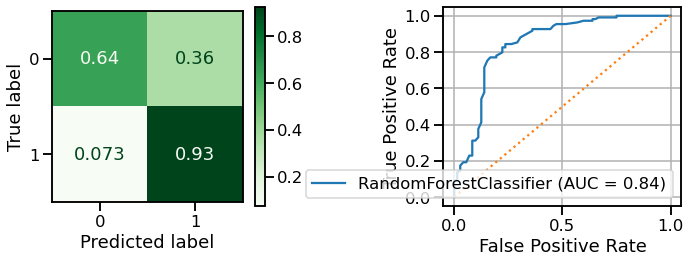

Training Score = 1.00
Test Score = 0.81


In [63]:
## Evaluate Model using function
evaluate_classification(rf,X_test_tfidf,y_test,
                        X_train=X_train_tfidf,y_train=y_train)

/opt/anaconda3/envs/learn-env-new/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 127480 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/envs/learn-env-new/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 127482 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/envs/learn-env-new/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 127480 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/envs/learn-env-new/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 127482 missing from current font.
  font.set_text(s, 0, flags=flags)


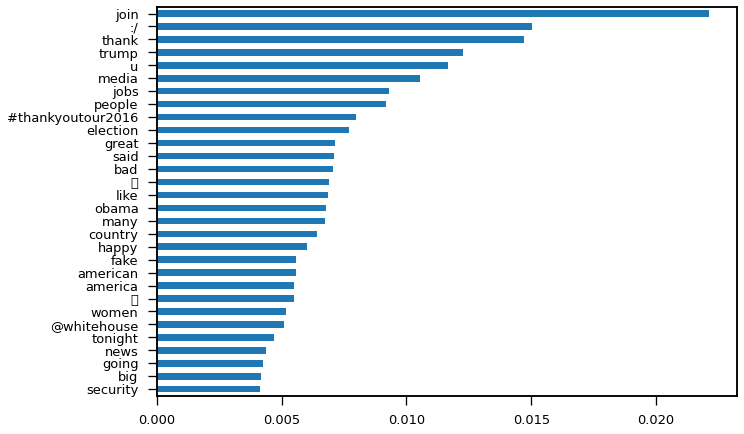

In [64]:
# Plot the top 30 most important features
with plt.style.context('seaborn-talk'):

    ## Get Feature Importance
    importance = pd.Series(rf.feature_importances_,
                           index=vectorizer.get_feature_names())

    ## Take the .tail 30 and plot kind='barh'
    importance.sort_values().tail(30).plot(kind='barh')

## Pipelines and GridSearch for NLP

- You may want to to this process in multiple steps (first Count Vectorize, then transform to TF or TF-IDF.
- Can then use these in a Pipeline to be able to GridSearch more aspects of the text preprocessing

```python
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer #TfidfVectorizer
from sklearn.pipeline import Pipeline

text_pipe = Pipeline(steps=[
    ('count_vectorizer',CountVectorizer()),
    ('tf_transformer',TfidfTransformer(use_idf=False))
])


```


In [65]:
from sklearn import set_config
set_config(display='diagram')

In [66]:
## Make a text preprocessing pipeline
tokenizer = TweetTokenizer(preserve_case=True)

text_pipe = Pipeline(steps=[
    ('count_vectorizer',CountVectorizer(tokenizer=tokenizer.tokenize)),
    ('tf_transformer',TfidfTransformer(use_idf=True))])
text_pipe

Pipeline(steps=[('count_vectorizer',
                 CountVectorizer(tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x7ffa1f5027c0>>)),
                ('tf_transformer', TfidfTransformer())])

In [67]:
## Remind ourselves what X_train looks like 
X_train

created_at
2017-01-20 17:54:36    We will bring back our jobs. We will bring bac...
2017-03-25 14:41:14    Watch @JudgeJeanine on @FoxNews tonight at 9:0...
2017-02-25 21:53:21    I will not be attending the White House Corres...
2017-02-15 19:17:59    Welcome to the United States @IsraeliPM Benjam...
2017-03-15 10:55:30    Does anybody really believe that a reporter wh...
                                             ...                        
2016-12-15 22:27:16    Join me in Mobile Alabama on Sat. at 3pm! #Tha...
2016-12-24 00:13:02    Vladimir Putin said today about Hillary and De...
2017-01-20 17:53:17    January 20th 2017 will be remembered as the da...
2017-02-15 13:13:10    The real scandal here is that classified infor...
2016-12-23 11:58:36    my presidency. Isn't this a ridiculous shame? ...
Name: text, Length: 422, dtype: object

In [68]:
## Test out the text pipeline on X_train
test_text_pipe = text_pipe.fit_transform(X_train)
test_text_pipe.todense()#.shape

matrix([[0.03837935, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.06925551, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.06910537, 0.31617248, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.06084864, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [69]:
## Make a full pipeline with the random forest model as the second step
rf_pipe = Pipeline(steps=[
    ('text_pipe',text_pipe),
    ('clf',RandomForestClassifier(class_weight='balanced'))
])
rf_pipe

Pipeline(steps=[('text_pipe',
                 Pipeline(steps=[('count_vectorizer',
                                  CountVectorizer(tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x7ffa1f5027c0>>)),
                                 ('tf_transformer', TfidfTransformer())])),
                ('clf', RandomForestClassifier(class_weight='balanced'))])

              precision    recall  f1-score   support

           0       0.90      0.72      0.80        72
           1       0.84      0.94      0.89       109

    accuracy                           0.86       181
   macro avg       0.87      0.83      0.84       181
weighted avg       0.86      0.86      0.85       181



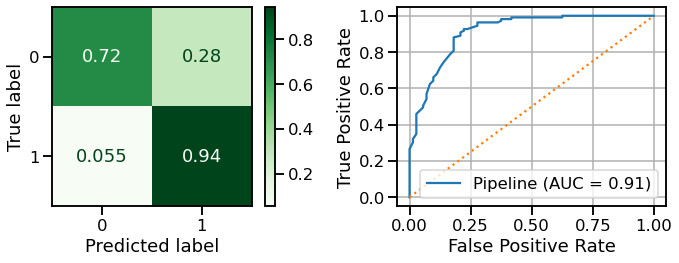

Training Score = 1.00
Test Score = 0.86


In [70]:
## Modeling with full pipeline
rf_pipe.fit(X_train,y_train)
evaluate_classification(rf_pipe,X_test, y_test,X_train=X_train,
                        y_train=y_train)

### GridSearching NLP Pipeline

In [71]:
set_config(display='text')

In [72]:
from sklearn.model_selection import GridSearchCV
## Make a tokenizer with TweetTokenizer
tokenizer = nltk.tokenize.TweetTokenizer(preserve_case=False,)

## Make params grid
params = {'text_pipe__tf_transformer__use_idf':[True, False],
          'text_pipe__tf_transformer__norm':['l2','l1'],
          'text_pipe__tf_transformer__use_idf':[True,False],
          'text_pipe__tf_transformer__smooth_idf':[True,False],
          
          'text_pipe__count_vectorizer__tokenizer':[ 
#               None,                                       
              TweetTokenizer(preserve_case=True).tokenize,
              TweetTokenizer(preserve_case=False).tokenize,
              TweetTokenizer(preserve_case=False, strip_handles=True).tokenize
          ],
          'text_pipe__count_vectorizer__stop_words':[stopwords_list],#None,
          'text_pipe__count_vectorizer__max_df':[1.0,0.95],
          'text_pipe__count_vectorizer__min_df':[1,2,3],
          
         'clf__criterion':['gini', 'entropy'],
         'clf__max_depth':[10,25,50,100]}

## Make and fit grid
grid = GridSearchCV(rf_pipe,params,cv=3,scoring='recall_macro',
                   verbose=2, n_jobs=-1)
grid.fit(X_train,y_train)
## Display best params
grid.best_params_

Fitting 3 folds for each of 1152 candidates, totalling 3456 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:   41.9s
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 3257 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 3456 out of 3456 | elapsed:  2.7min finished


{'clf__criterion': 'gini',
 'clf__max_depth': 10,
 'text_pipe__count_vectorizer__max_df': 0.95,
 'text_pipe__count_vectorizer__min_df': 1,
 'text_pipe__count_vectorizer__stop_words': ['i',
  'me',
  'my',
  'myself',
  'we',
  'our',
  'ours',
  'ourselves',
  'you',
  "you're",
  "you've",
  "you'll",
  "you'd",
  'your',
  'yours',
  'yourself',
  'yourselves',
  'he',
  'him',
  'his',
  'himself',
  'she',
  "she's",
  'her',
  'hers',
  'herself',
  'it',
  "it's",
  'its',
  'itself',
  'they',
  'them',
  'their',
  'theirs',
  'themselves',
  'what',
  'which',
  'who',
  'whom',
  'this',
  'that',
  "that'll",
  'these',
  'those',
  'am',
  'is',
  'are',
  'was',
  'were',
  'be',
  'been',
  'being',
  'have',
  'has',
  'had',
  'having',
  'do',
  'does',
  'did',
  'doing',
  'a',
  'an',
  'the',
  'and',
  'but',
  'if',
  'or',
  'because',
  'as',
  'while',
  'of',
  'at',
  'by',
  'for',
  'with',
  'about',
  'against',
  'between',
  'into',
  'through',
  'dur

In [73]:
## Evluate the best_estimator
best_pipe = grid.best_estimator_
best_pipe

Pipeline(steps=[('text_pipe',
                 Pipeline(steps=[('count_vectorizer',
                                  CountVectorizer(max_df=0.95,
                                                  stop_words=['i', 'me', 'my',
                                                              'myself', 'we',
                                                              'our', 'ours',
                                                              'ourselves',
                                                              'you', "you're",
                                                              "you've",
                                                              "you'll", "you'd",
                                                              'your', 'yours',
                                                              'yourself',
                                                              'yourselves',
                                                              'he', 'him',
        

In [74]:
## Check the named steps for text_pipe, count_vectorizer, and get params
rf_pipe.named_steps['text_pipe'].named_steps['count_vectorizer'].get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 1),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': <bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x7ffa1f5027c0>>,
 'vocabulary': None}

In [75]:
vectorizer_params = rf_pipe.named_steps['text_pipe'].named_steps['count_vectorizer'].get_params()
vectorizer_params['tokenizer']#.get_params()


<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x7ffa1f5027c0>>

In [76]:
## Which topkenizer did it use?
best_pipe.named_steps['text_pipe']#.named_steps['tokenizer']

Pipeline(steps=[('count_vectorizer',
                 CountVectorizer(max_df=0.95,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                 tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x7ffa23ec4310>>)),
                ('tf_transformer', TfidfTransformer(norm='l1'))])

              precision    recall  f1-score   support

           0       0.72      0.71      0.71        72
           1       0.81      0.82      0.81       109

    accuracy                           0.77       181
   macro avg       0.76      0.76      0.76       181
weighted avg       0.77      0.77      0.77       181



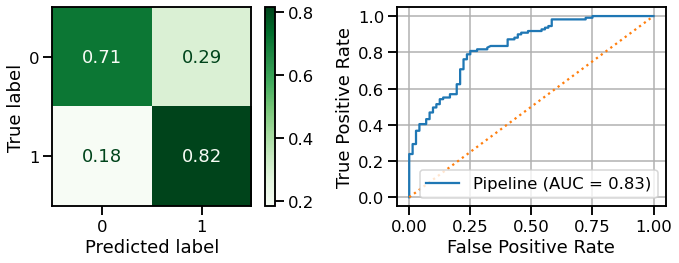

Training Score = 0.95
Test Score = 0.77


In [77]:
### evalaute the best pipe
evaluate_classification(best_pipe,X_test, y_test,X_train=X_train,
                        y_train=y_train)

## Get feature importances as text

In [78]:
X_train_pipe = text_pipe.fit_transform(X_train)
X_test_pipe = text_pipe.transform(X_test)
X_train_pipe

<422x2240 sparse matrix of type '<class 'numpy.float64'>'
	with 8768 stored elements in Compressed Sparse Row format>

In [79]:
X_train_pipe.shape

(422, 2240)

In [80]:
## Get CountVectorizer from pipe
vect_from_pipe = best_pipe.named_steps['text_pipe'].named_steps['count_vectorizer']
vect_from_pipe

CountVectorizer(max_df=0.95,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x7ffa23ec4310>>)

In [81]:
## Get TfidfTransformer from pipe
tf_from_pipe = rf_pipe.named_steps['text_pipe'].named_steps['tf_transformer']
tf_from_pipe

TfidfTransformer()

In [82]:
## Get feature naames from vectorizer
features = vect_from_pipe.get_feature_names()
features[:10]

['#1in',
 '#americafirst',
 '#draintheswam',
 '#facebook',
 '#fakenews',
 '#godblesstheusa',
 '#hannity',
 '#icymi',
 '#inauguration',
 '#inauguration2017']

In [83]:
## Check the len of features 
len(features)

2094

In [84]:
## Check the length of feature importanceas
len(best_pipe.named_steps['clf'].feature_importances_)

2094

In [85]:
## Save feature importances as a series
importance = pd.Series(best_pipe.named_steps['clf'].feature_importances_,
                       index= features)
importance.sort_values(ascending=False)

join         0.030130
media        0.029755
jobs         0.025581
:/           0.024606
election     0.023535
               ...   
major        0.000000
majority     0.000000
weakening    0.000000
man          0.000000
#1in         0.000000
Length: 2094, dtype: float64

/opt/anaconda3/envs/learn-env-new/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 127480 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/envs/learn-env-new/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 127482 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/envs/learn-env-new/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 127480 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/envs/learn-env-new/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 127482 missing from current font.
  font.set_text(s, 0, flags=flags)


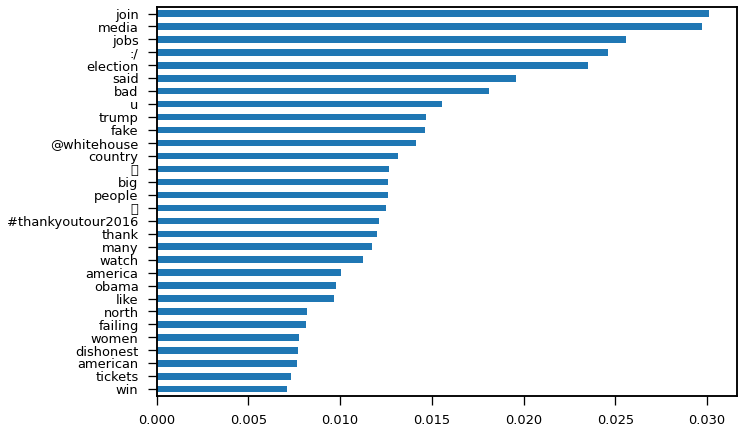

In [86]:
with plt.style.context('seaborn-talk'):
    importance.sort_values().tail(30).plot(kind='barh')

In [87]:
# df[df['text'].str.contains('...',regex=False)]['source'].value_counts(normalize=True)

In [88]:
## Saving the probability of 
top_word_probs = {}
for word in importance.tail(20).index:
    rows = df['text'].str.contains(word,regex=False,case=False)
    val_count= df[rows]['source'].value_counts(normalize=True)
    top_word_probs[word] = val_count
#     print(f'\n\n{word}:\n{val_count}')

In [89]:
top_probs = pd.DataFrame(top_word_probs).T.fillna(0.0)
top_probs.style.background_gradient(axis=1)

,Twitter for Android,Twitter for iPhone
year,0.575758,0.424242
years,0.466667,0.533333
yes,0.909091,0.090909
yesterday,0.888889,0.111111
yet,0.444444,0.555556
yo,0.403670,0.596330
yr,0.400000,0.600000
–,0.200000,0.800000
—,0.000000,1.000000
☀,1.000000,0.000000


# **`Part 2` Topic 28: Bayesian Classification**

## Learning Objectives

- Understand how Bayes theorem can be applied to classify data using conditional probabilities.
- Revisit our Topic 17 study group example of Maximum Likelihood Estimation.

- Understand Gaussian Naive Bayes and how it uses the Probability Density Function of a Normal Distribution 

<!-- - Understand the "underflow" issue and how to fix. -->

- Apply naive bayes for tabular data and text data
-  Document Classification with Naive Bayes - Finding Trump

## Bayes Theorem Revisited

<!-- $$ \large P(A|B) = \dfrac{P(B|A)(A)}{P(B)}$$





$$ \Large P(y|x_1, x_2, ..., x_n) = \frac{P(y)\prod_{i}^{n}P(x_i|y)}{P(x_1, x_2, ..., x_n)}$$ 
 -->

***The Bayesian interpretation of this formula is***



$$ \large P(A|B) = \dfrac{P(B|A)P(A)}{P(B)}$$


$$ \large \text{Posterior} = \dfrac{\text{Likelihood} \cdot \text{Prior}}{\text{Evidence}}$$

<img src ="../ds-nlp_modeling-main/img/naive_bayes_icon.png">

> #### Revisit Topic 17 MLE Example

## Gaussian Naive Bayes [Non-Text Data]

- Gaussian Naive Bayes makes the assumption that our probabilities follow a normal distribution.
- It uses the Probability Density Function for a Normal (Gaussian) Distribution to get point estimates of the probabilities.

> **Note: above we used the normal distribution probability density function to estimate likelihood, which is essentiall what Guassian Naive Bayes does!!**


In [90]:
from scipy import stats
from sklearn import datasets
iris = datasets.load_iris()

X = pd.DataFrame(iris.data)
X.columns = iris.feature_names

y = pd.DataFrame(iris.target)
y.columns = ['Target']

df = pd.concat([X, y], axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [91]:
## Getting names of flowers
target_map = dict(zip([0,1,2],iris.target_names))

df['Target'] = df['Target'].map(target_map)
df['Target'].value_counts(dropna=False)

versicolor    50
setosa        50
virginica     50
Name: Target, dtype: int64

In [92]:
## Train test split
X_tr, X_te,y_tr,y_te = train_test_split(X,y)

## Saving df-train for later
df_train = pd.concat([X_tr,y_tr],axis=1)
df_train['Target'] = df_train['Target'].map(target_map)
X_tr.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
132,6.4,2.8,5.6,2.2
2,4.7,3.2,1.3,0.2
52,6.9,3.1,4.9,1.5
30,4.8,3.1,1.6,0.2
59,5.2,2.7,3.9,1.4


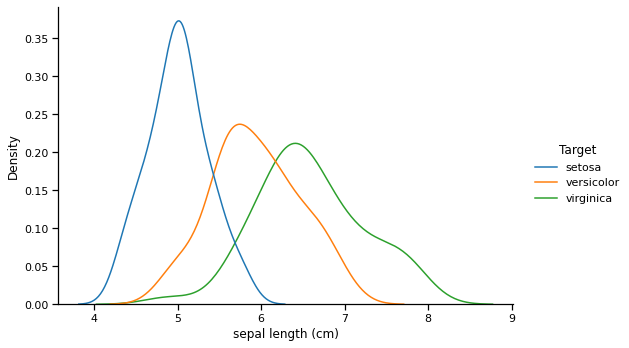

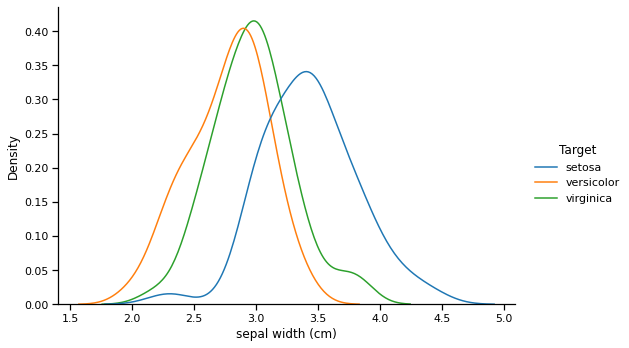

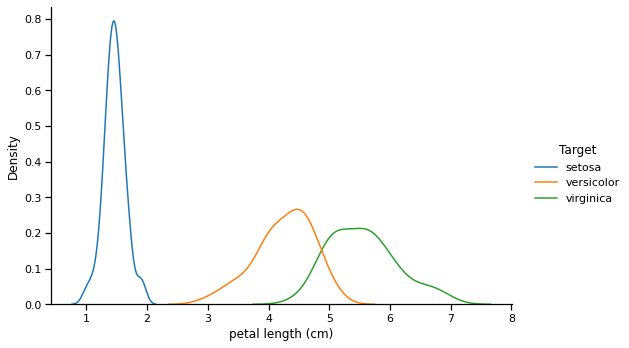

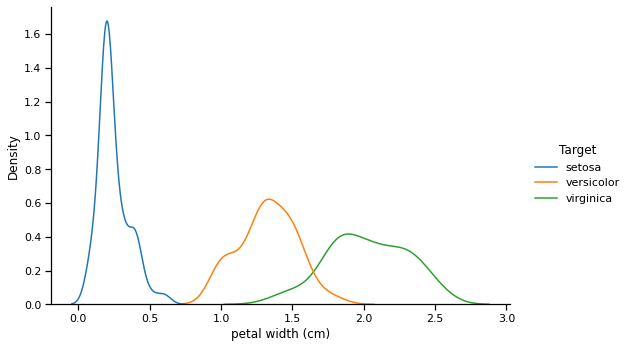

In [93]:
## Checking Distribution of each feature by taargets
sns.set_context('notebook')
for col in X.columns:
    sns.displot(data=df, x=col, kind='kde',hue='Target',aspect=1.5)

> Each flower's characteristics form a normal-ish distribution with a specific mean and std. 

- Using the Normal Distribution Probability Density function, we can calculate the likelihoods of a specific flower's stats for each of our target classes. 
- Whichever likelihood is highest will determine the model's prediction. 

$$ \Large P(x_i|y) = \frac{1}{\sqrt{2 \pi \sigma_i^2}}e^{\frac{-(x-\mu_i)^2}{2\sigma_i^2}}$$



In [94]:
## Get the mean and std of each target
aggs = df_train.groupby('Target').agg(['mean', 'std'])
aggs

sepal length (cm)           sepal width (cm)            \
                        mean       std             mean       std   
Target                                                              
setosa              4.963889  0.359486         3.388889  0.398410   
versicolor          5.943590  0.515443         2.784615  0.319982   
virginica           6.516216  0.634872         2.940541  0.305013   

           petal length (cm)           petal width (cm)            
                        mean       std             mean       std  
Target                                                             
setosa              1.472222  0.168372         0.225000  0.084092  
versicolor          4.269231  0.448479         1.325641  0.206114  
virginica           5.500000  0.515860         2.010811  0.275665

In [95]:
## Selecting an example flower to examine
ex_flower_stats = df_train.iloc[20]
ex_flower_label = ex_flower_stats.pop('Target')
ex_flower_stats

sepal length (cm)    5.7
sepal width (cm)       3
petal length (cm)    4.2
petal width (cm)     1.2
Name: 95, dtype: object

In [96]:
## get list of classes and list  of stats
classes = df_train["Target"].unique()
classes

stats_list = ex_flower_stats.index.to_list()

$$ \Large P(y|x_1, x_2, ..., x_n) = \frac{P(y)\prod_{i}^{n}P(x_i|y)}{P(x_1, x_2, ..., x_n)}$$ 


In [97]:
target_map

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [98]:
import math
def calc_likelihood(x,mu,std):
    """Write a function to calculate the expected value at 
    a particular point using the equation above."""
   
    e_num = math.e**((-1*(x-mu)**2)/(2*std**2))
    denom = std * np.sqrt(math.pi*2 )
    return 1/denom*e_num


likelihoods = {}
for stat in stats_list:
#     for class_ in classes:
    setosa = calc_likelihood(ex_flower_stats.loc[stat],
                                     aggs.loc['setosa',(stat,'mean')],
                                      aggs.loc['setosa',(stat,'std')])
    versicolor = calc_likelihood(ex_flower_stats.loc[stat],
                                 aggs.loc['versicolor',(stat,'mean')],
                                  aggs.loc['versicolor',(stat,'std')])
    virginica = calc_likelihood(ex_flower_stats.loc[stat],
                                 aggs.loc['virginica',(stat,'mean')],
                                  aggs.loc['virginica',(stat,'std')])
    likelihoods[stat]={'setosa':setosa,
               'versicolor':versicolor,
               'virginica':virginica}
    
df_likelihoods = pd.DataFrame(likelihoods)
df_likelihoods

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
setosa,0.136375,0.621852,2.400738e-57,3.052517e-29
versicolor,0.692202,0.994028,8.790089e-01,1.607368e+00
virginica,0.274985,1.283333,3.230985e-02,1.914001e-02


In [99]:
## Which likelihhods are the largest
df_likelihoods.idxmax()

sepal length (cm)    versicolor
sepal width (cm)      virginica
petal length (cm)    versicolor
petal width (cm)     versicolor
dtype: object

> This is how Gaussian Naive Bayes makes it predictions

/opt/anaconda3/envs/learn-env-new/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.92      1.00      0.96        11
           2       1.00      0.92      0.96        13

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



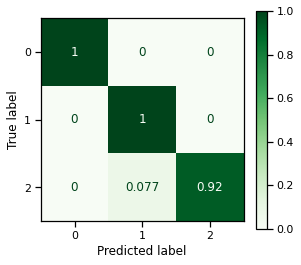

Training Score = 0.96
Test Score = 0.97


In [100]:
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB()
bayes.fit(X_tr,y_tr)
evaluate_classification(bayes,X_te,y_te,X_train=X_tr,y_train=y_tr)

## Text Classification with Naive Bayes

 $$ \large P(\text{Spam | Word}) = \dfrac{P(\text{Word | Spam})P(\text{Spam})}{P(\text{Word})}$$  

- Where $P(\text{Word | Spam})$ is

 $$ \large P(\text{Word | Spam}) = \dfrac{\text{Word Frequency in Document}}{\text{Word Frequency Across All Spam Documents}}$$  

> "However, this formulation has a problem: **what if you encounter a word in the test set that was not present in the training set?** This new word would have a frequency of zero! To effectively counteract these issues, Laplacian smoothing is often used giving:"  

- ***Laplacian smoothing:***

 $$P(\text{Word | Spam}) = \dfrac{\text{Word Frequency in Document} + 1}{\text{Word Frequency Across All Spam Documents + Number of Words in Corpus Vocabulary}}$$  


## ⏰ **Activity Continued:  Finding Trump with Naive Bayes**

In [101]:
text_pipe

Pipeline(steps=[('count_vectorizer',
                 CountVectorizer(tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x7ffa1f5027c0>>)),
                ('tf_transformer', TfidfTransformer())])

In [102]:
## Use text pipe to 
X_train_pipe = text_pipe.fit_transform(X_train)
X_test_pipe = text_pipe.transform(X_test)
X_train_pipe

<422x2240 sparse matrix of type '<class 'numpy.float64'>'
	with 8768 stored elements in Compressed Sparse Row format>

              precision    recall  f1-score   support

           0       1.00      0.50      0.67        72
           1       0.75      1.00      0.86       109

    accuracy                           0.80       181
   macro avg       0.88      0.75      0.76       181
weighted avg       0.85      0.80      0.78       181



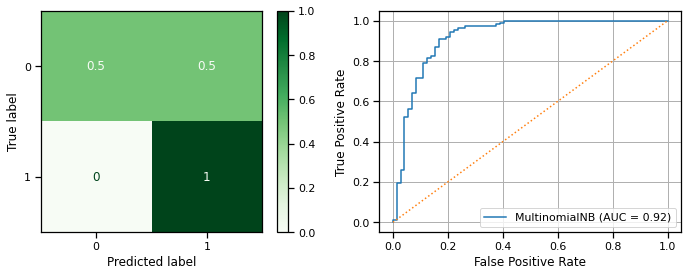

Training Score = 0.90
Test Score = 0.80


In [103]:
## Make a naive bayes classifier
nb_classifier = MultinomialNB()#alpha = 1.0e-08)
nb_classifier.fit(X_train_pipe,y_train)
evaluate_classification(nb_classifier,X_test_pipe,y_test, X_train=X_train_pipe,
                       y_train=y_train)


In [104]:
### Make a new pipeline for bayes

nb_pipe = Pipeline(steps=[
    ('text_pipe',text_pipe),
    ('clf',MultinomialNB())
])


params = {'text_pipe__tf_transformer__use_idf':[True, False],
          'text_pipe__tf_transformer__norm':['l2','l1'],
          'text_pipe__tf_transformer__use_idf':[True,False],
          'text_pipe__tf_transformer__smooth_idf':[True,False],
          'text_pipe__count_vectorizer__tokenizer':[ 
#               None,                                       
              TweetTokenizer(preserve_case=True).tokenize,
              TweetTokenizer(preserve_case=False).tokenize],
          
          'text_pipe__count_vectorizer__stop_words':[None,stopwords_list],
          'text_pipe__count_vectorizer__max_df':[1.0,0.95,0.9],
          'text_pipe__count_vectorizer__min_df':[1,2,3],
          
         'clf__alpha':[0, 1],
         'clf__fit_prior':[True,False]}


## Make and fit grid
grid = GridSearchCV(nb_pipe,params,cv=3,scoring='recall_macro',
                   verbose=2, n_jobs=-1)
grid.fit(X_train,y_train)
## Display best params
grid.best_params_

Fitting 3 folds for each of 1152 candidates, totalling 3456 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 252 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 658 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 1224 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 1954 tasks      | elapsed:   25.2s
[Parallel(n_jobs=-1)]: Done 2844 tasks      | elapsed:   37.3s
[Parallel(n_jobs=-1)]: Done 3456 out of 3456 | elapsed:   44.7s finished


{'clf__alpha': 1,
 'clf__fit_prior': False,
 'text_pipe__count_vectorizer__max_df': 1.0,
 'text_pipe__count_vectorizer__min_df': 2,
 'text_pipe__count_vectorizer__stop_words': None,
 'text_pipe__count_vectorizer__tokenizer': <bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x7ffa28284130>>,
 'text_pipe__tf_transformer__norm': 'l2',
 'text_pipe__tf_transformer__smooth_idf': True,
 'text_pipe__tf_transformer__use_idf': True}

              precision    recall  f1-score   support

           0       0.92      0.76      0.83        72
           1       0.86      0.95      0.90       109

    accuracy                           0.88       181
   macro avg       0.89      0.86      0.87       181
weighted avg       0.88      0.88      0.88       181



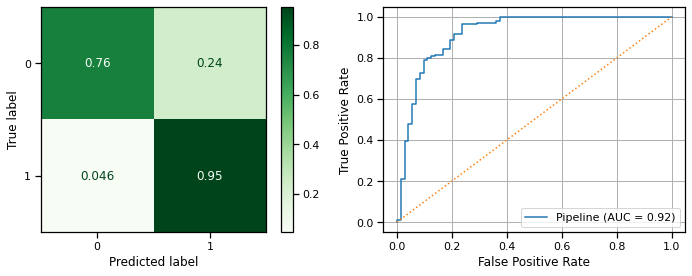

Training Score = 0.92
Test Score = 0.88


In [105]:
## Evluate the best_estimator
best_pipe = grid.best_estimator_
evaluate_classification(best_pipe,X_test,y_test,X_train=X_train,y_train=y_train)

# APPENDIX

In [106]:
raise Exception("Stop!")

Exception: Stop!

## T-SNE (for Student Question)

In [ ]:
X_train_pipe.todense()

In [ ]:
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
## TSNE For Visualizing High Dimensional Data
t_sne_object_3d = TSNE(n_components=3)
transformed_data_3d = t_sne_object_3d.fit_transform(X_train_pipe)
transformed_data_3d

In [ ]:
## Separate into Trump/Not Trump
trump = transformed_data_3d[y_train==1]
not_trump = transformed_data_3d[y_train==0]

In [ ]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(projection='3d')

ax.scatter(trump[:,0],trump[:,1],
           trump[:,2],c='orange',label='Trump')
ax.scatter(not_trump[:,0],not_trump[:,1],
           not_trump[:,2],c='black',label='Not Trump')
ax.legend()
ax.view_init(30, 10)


fig.tight_layout()

In [ ]:
## TSNE For Visualizing High Dimensional Data
t_sne_object_2d = TSNE(n_components=2)
transformed_data_2d = t_sne_object_2d.fit_transform(X_train_pipe)
## Separate into Trump/Not Trump
trump = transformed_data_2d[y_train==1]
not_trump = transformed_data_2d[y_train==0]

In [ ]:
fig,ax = plt.subplots(figsize=(20,10))
ax.scatter(trump[:,0],trump[:,1],c='orange',label='Trump')
ax.scatter(not_trump[:,0],not_trump[:,1],c='black',label='Not Trump')
ax.legend()

fig.tight_layout()

### Interactive Tokenizer Example

In [ ]:
from nltk import word_tokenize
from ipywidgets import interact

@interact
def tokenize_tweet(i=(0,len(corpus)-1)):
    from nltk.corpus import stopwords
    import string
    from nltk import word_tokenize,regexp_tokenize
    
    print(f"- Tweet #{i}:\n")
    print(corpus[i],'\n')
    tokens = word_tokenize(corpus[i])

    # Get all the stop words in the English language
    stopwords_list = stopwords.words('english')
    stopwords_list += string.punctuation
    stopped_tokens = [w.lower() for w in tokens if w not in stopwords_list]
    
    print(tokens,end='\n\n')
    print(stopped_tokens)

### NLP Vocabulary
- Corpus
    - Body of text
    
- Bag of Words
    - Collection of all words from a corpus.


## Regular Expressions

- Use https://regex101.com/ to test out regular expressions

## Context-Free Grammers and POS Tagging

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-context-free-grammars-and-POS-tagging-online-ds-ft-100719/master/images/new_LevelsOfLanguage-Graph.png">

#### Syntax and Meaning Can be Difficult for Computers 

In English, sentences consist of a **_Noun Phrase_** followed by a **_Verb Phrase_**, which may optionally be followed by a **_Prepositional Phrase_**.

This ***seems simple, but it gets more tricky*** when we realize that there is a recursive structure to these phrases.

- A noun phrase may consist of multiple smaller noun phrases, and in some cases, even a verb phrase. 
- Similarly, a verb phrase can consist of multiple smaller verb phrases and noun phrases, which can themselves be made up of smaller noun phrases and verb phrases. 


This leads levels of **_ambiguity_** that can be troublesome for computers. NLTK's documentation explains this by examining the classic Groucho Marx joke:

> ***"While hunting in Africa, I shot an elephant in my pajamas. How he got into my pajamas, I don't know."***



<img src="https://raw.githubusercontent.com/jirvingphd/dsc-context-free-grammars-and-POS-tagging-online-ds-ft-100719/master/images/parse_tree.png">

## [MANUAL] Gaussian Naive Bayes [Non-Text Data]

- Gaussian Naive Bayes makes the assumption that our probabilities follow a normal distribution.
- It uses the Probability Density Function for a Normal (Gaussian) Distribution to get point estimates of the probabilities.

> **Note: above we used the normal distribution probability density function to estimate likelihood, which is essentiall what Guassian Naive Bayes does!!**


In [ ]:
from scipy import stats
from sklearn import datasets
iris = datasets.load_iris()

X = pd.DataFrame(iris.data)
X.columns = iris.feature_names

y = pd.DataFrame(iris.target)
y.columns = ['Target']

df = pd.concat([X, y], axis=1)
df.head()

In [ ]:
target_map = dict(zip([0,1,2],iris.target_names))
target_map

In [ ]:
df['Target'].map(target_map).value_counts()

- Suppose we have three competing hypotheses $\{versicolor, virginica, setosa\}$ that would explain our evidence $e$.
    - Then we could use Bayes's Theorem to calculate the posterior probabilities for each of these three:
        - $\large P(versicolor|e) = \frac{P(versicolor)P(e|versicolor)}{P(e)}$
        - $\large P(virginica|e) = \frac{P(virginica)P(e|virginica)}{P(e)}$
        - $\large P(h_3|e) = \frac{P(h_3)P(e|h_3)}{P(e)}$
        

In [ ]:
X_tr, X_te,y_tr,y_te = train_test_split(X,y)
X_tr.head()

$$ \Large P(x_i|y) = \frac{1}{\sqrt{2 \pi \sigma_i^2}}e^{\frac{-(x-\mu_i)^2}{2\sigma_i^2}}$$

$$ \Large P(y|x_1, x_2, ..., x_n) = \frac{P(y)\prod_{i}^{n}P(x_i|y)}{P(x_1, x_2, ..., x_n)}$$ 


In [ ]:
aggs = df.groupby('Target').agg(['mean', 'std'])
aggs

In [ ]:
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB()
bayes.fit(X_tr,y_tr)
evaluate_classification(bayes,X_te,y_te,X_train=X_tr,y_train=y_tr)

In [ ]:
def p_x_given_class(obs_row, feature, class_):
    mu = aggs[feature]['mean'][class_]
    std = aggs[feature]['std'][class_]
    
    # A single observation
    obs = df.iloc[obs_row][feature] 
    
    p_x_given_y = stats.norm.pdf(obs, loc=mu, scale=std)
    return p_x_given_y

# Notice how this is not a true probability; you can get values > 1
p_x_given_class(0, 'petal length (cm)', 0) 

In [ ]:
row = 100
c_probs = []
for c in range(3):
    # Initialize probability to relative probability of class 
    p = len(df[df['Target'] == c])/len(df) 
    for feature in X.columns:
        p *= p_x_given_class(row, feature, c) 
        # Update the probability using the point estimate for each feature
        c_probs.append(p)

c_probs

In [ ]:
def predict_class(row):
    c_probs = []
    for c in range(3):
        # Initialize probability to relative probability of class
        p = len(df[df['Target'] == c])/len(df) 
        for feature in X.columns:
            p *= p_x_given_class(row, feature, c)
        c_probs.append(p)
    return np.argmax(c_probs)

In [ ]:
row = 0
df.iloc[row]
predict_class(row)

In [ ]:
df['Predictions'] =  [predict_class(row) for row in df.index]
df['Correct?'] = df['Target'] == df['Predictions']
df['Correct?'].value_counts(normalize=True)

### Avoiding "underflow"

> "...repeatedly multiplying small probabilities can lead to underflow; rounding to zero due to numerical approximation limitations. As such, a common alternative is to add the logarithms of the probabilities as opposed to multiplying the raw probabilities themselves..."<br>
$$ \large e^x \cdot e^y = e^{x+y}$$  
$$ \large log_{e}(e)=1 $$  
$$\large  e^{log(x)} = x$$ 

With that, here's an updated version of the function using log probabilities to avoid underflow:

In [ ]:
def predict_class_log(row):
    c_probs = []
    for c in range(3):
        # Initialize probability to relative probability of class
        p = len(df[df['Target'] == c])/len(df) 
        for feature in X.columns:
            p += np.log(p_x_given_class(row, feature, c))
        c_probs.append(p)
    return np.argmax(c_probs)

In [ ]:
row = 0

df.iloc[row]
print(predict_class_log(row))
df['Predictions'] =  [predict_class_log(row) for row in df.index]
df['Correct?'] = df['Target'] == df['Predictions']
df['Correct?'].value_counts(normalize=True)